# EXAM QCOMPUTING:
---

In [1]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

## Problem 1

### 1)

In [91]:
n_bits = 3
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=n_bits + 1)


def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = "".join(str(j) for j in combo)
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values=combo_str)


def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.

    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)


def diffusion():
    """Implement the diffusion operator using the Hadamard transform and
    multi-controlled X."""
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values="0" * len(query_register))
    hadamard_transform(query_register)


@qml.qnode(dev)
def grover_circuit_combo_001():
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register, for combo 001.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    combo = [0, 0, 1]

    # PREPARE QUERY AND AUXILIARY SYSTEM
    hadamard_transform(query_register)
    qml.PauliX(wires=aux)
    qml.Hadamard(wires=aux)

    # APPLY GROVER ITERATION
    oracle(combo)
    diffusion()

    return qml.probs(wires=query_register)

Probability of each result (000, 001, ...): [0.03125 0.78125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]


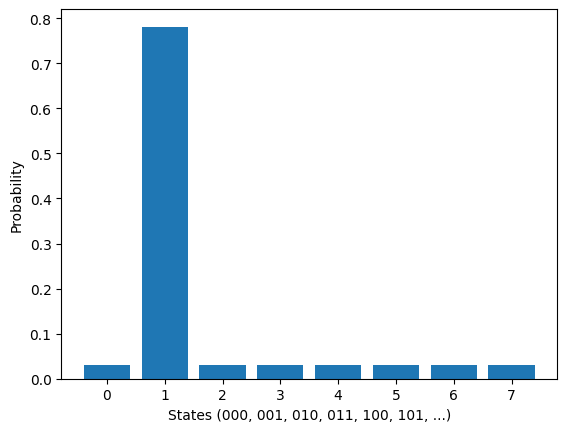

In [173]:
results = grover_circuit_combo_001()
print("Probability of each result (000, 001, ...):", results)
plt.bar(range(2**n_bits), results)
plt.xlabel("States (000, 001, 010, 011, 100, 101, ...)")
plt.ylabel("Probability")
plt.show()

### 2)

In [4]:
def grover_iter_combo_001(num_steps):
    """Run Grover search for a given secret combination and a number of iterations for combo 001.

    Args:
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """
    combo = [0, 0, 1]
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register + aux
    dev = qml.device("default.qubit", wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        # Prepare the query and auxiliary system
        hadamard_transform(query_register)
        qml.PauliX(wires=aux)
        qml.Hadamard(wires=aux)

        # Apply Grover iterations
        for _ in range(num_steps):
            oracle(combo)
            diffusion()

        return qml.probs(wires=query_register)

    return inner_circuit()

Probability of finding 001, by steps: [0.12499999999999992, 0.7812499999999989, 0.9453124999999976, 0.33007812499999895, 0.012207031249999927, 0.547973632812497, 0.9997863769531184, 0.5769729614257767, 0.019456863403320115, 0.3028912544250459, 0.9312659502029316, 0.8049252331256771, 0.14496535807847785, 0.10631610639393187, 0.7566136685199918, 0.9578373107360516, 0.35784565916400707, 0.006624104054935611, 0.5188103668497102, 0.9980784876574738]


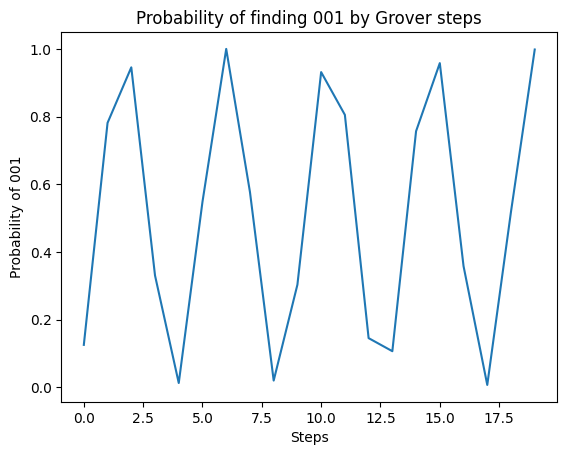

In [171]:
total_steps = 20
prob_steps = []
for step in range(total_steps):
    # print(f"Step {step + 1}: {grover_iter_combo_001(step)}")
    probs = grover_iter_combo_001(step)
    prob_steps.append(float(probs[1]))
print("Probability of finding 001, by steps:", prob_steps)

# Plot the amplitudes
plt.plot(range(len(prob_steps)), np.abs(prob_steps))
plt.xlabel("Steps")
plt.ylabel("Probability of 001")
plt.title(f"Probability of finding 001 by Grover steps")
plt.show()

And as we know, the optimal num_steps should be `\pi/4 * \sqrt{8}=2.2214`, meaning that every ~2 steps it gets worse! As we can see in the plot.

### 3)

In [168]:
def oracle_for_PlusPlusMinus(combo):
    """Implement an oracle using a multi-controlled X gate for the |++-> state.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    # Change base from |++-> to |001>
    for i in query_register:
        qml.H(wires=i)

    oracle(combo)

    # Change base from |001> to |++->:
    for i in query_register:
        qml.H(wires=i)


@qml.qnode(dev)
def grover_circuit_combo_PlusPlusMinus():
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register, for combo PlusPlusMinus.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    combo = [0, 0, 1]

    hadamard_transform(query_register)
    qml.PauliX(wires=aux)
    qml.Hadamard(wires=aux)

    # APPLY GROVER ITERATION
    oracle_for_PlusPlusMinus(combo)
    diffusion()

    return qml.probs(wires=query_register)

Probability of each result (000, 001, ...): [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


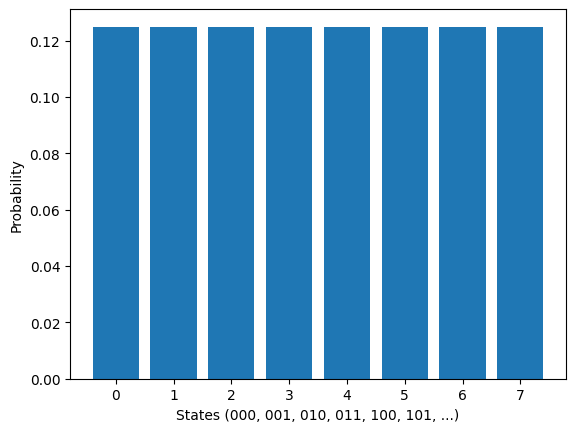

In [174]:
results = grover_circuit_combo_PlusPlusMinus()
print("Probability of each result (000, 001, ...):", results)
plt.bar(range(2**n_bits), results)
plt.xlabel("States (000, 001, 010, 011, 100, 101, ...)")
plt.ylabel("Probability")
plt.show()

### 4)

In [165]:
def oracle_for_001_plus_011(combo):
    """Implement an oracle using a multi-controlled X gate for the |++-> state.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    # Change base from |0+1> to |001>
    qml.H(wires=1)
    oracle(combo)
    qml.H(wires=1)


@qml.qnode(dev)
def grover_circuit_combo_001_plus_011():
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register, for combo 001_plus_011.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    combo = [0, 0, 1]

    hadamard_transform(query_register)
    qml.PauliX(wires=aux)
    qml.Hadamard(wires=aux)

    # APPLY GROVER ITERATION
    oracle_for_001_plus_011(combo)
    diffusion()

    return qml.probs(wires=query_register)

Probability of each result (000, 001, ...): [0.  0.5 0.  0.5 0.  0.  0.  0. ]


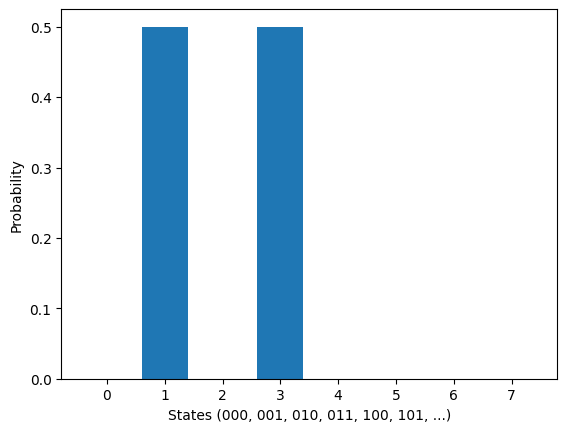

In [175]:
results = grover_circuit_combo_001_plus_011()
print("Probability of each result (000, 001, ...):", results)
plt.bar(range(2**n_bits), results)
plt.xlabel("States (000, 001, 010, 011, 100, 101, ...)")
plt.ylabel("Probability")
plt.show()

----

## Problem 2

### 1)

### Listing big primes:

In [ ]:
from sympy.ntheory import factorint

big_prime_numbers = [
    524287,
    6700417,
    2147483647,
    999999000001,
    67280421310721,
    170141183460469231731687303715884105727,
    20988936657440586486151264256610222593863921,
]
big_2primes = big_prime_numbers[5] * big_prime_numbers[4]
# Next pair explodes:
# big_2primes = big_prime_numbers[5] * big_prime_numbers[6]

factorint(big_2primes)

{67280421310721: 1, 170141183460469231731687303715884105727: 1}

### First approach with primes:

In [ ]:
import time

times = []

for i in range(55):
    start_time = time.time()
    result = factorint(big_prime_numbers[0] ** (i * 10))
    # print(f"Big number {i}:", result)
    time_it_took = time.time() - start_time
    print("--- %s seconds ---" % time_it_took)
    times.append(time_it_took)

--- 1.0967254638671875e-05 seconds ---
--- 0.00024008750915527344 seconds ---
--- 0.000762939453125 seconds ---
--- 0.0017421245574951172 seconds ---
--- 0.0029320716857910156 seconds ---
--- 0.004797935485839844 seconds ---
--- 0.008337259292602539 seconds ---
--- 0.010560989379882812 seconds ---
--- 0.018769025802612305 seconds ---
--- 0.03729724884033203 seconds ---
--- 0.021857023239135742 seconds ---
--- 0.026983976364135742 seconds ---
--- 0.035492897033691406 seconds ---
--- 0.04493117332458496 seconds ---
--- 0.05431413650512695 seconds ---
--- 0.06933188438415527 seconds ---
--- 0.08316779136657715 seconds ---
--- 0.09798669815063477 seconds ---
--- 0.11864924430847168 seconds ---
--- 0.13713788986206055 seconds ---
--- 0.16023588180541992 seconds ---
--- 0.21803689002990723 seconds ---
--- 0.21301698684692383 seconds ---
--- 0.23204398155212402 seconds ---
--- 0.26346421241760254 seconds ---
--- 0.29794883728027344 seconds ---
--- 0.3309168815612793 seconds ---
--- 0.37054395

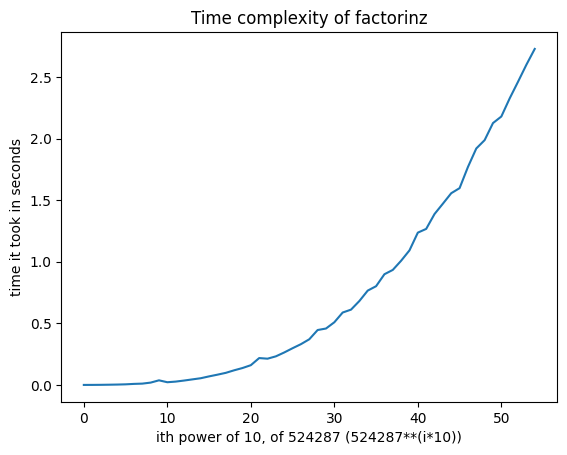

In [255]:
plt.plot(range(len(times)), times)
plt.xlabel("ith power of 10, of 524287 (524287**(i*10))")
plt.ylabel("time it took in seconds")
plt.title("Time complexity of factorinz")
plt.show()


Showing that it is exponential with the number of size of the number (numero de xifres)

### 2nd approach, with consecutives:

In [251]:
times_2 = []

for i in range(10**6, 10**12, (10**6) + 13):
    start_time = time.time()
    result = factorint(i)
    time_it_took = time.time() - start_time
    times_2.append(time_it_took)


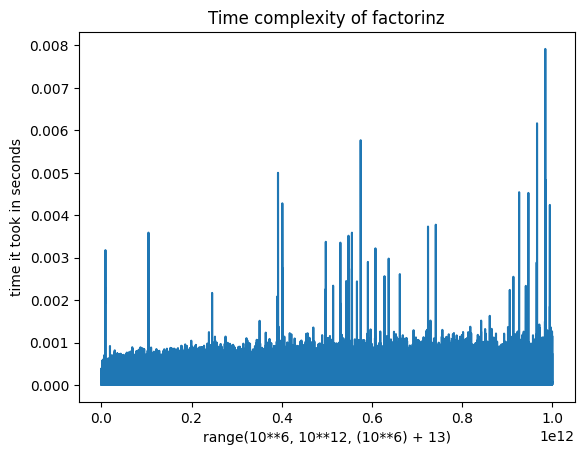

In [ ]:
plt.plot(range(10**6, 10**12, (10**6) + 13), times_2)
plt.xlabel("range(10**6, 10**12, (10**6) + 13)")
plt.ylabel("time it took in seconds")
plt.title("Time complexity of factorinz")
plt.show()


Here we also see, how some numbers even though are side by side, change the time drastically

### 2) We will use `shor()` function on the server of pennylane, where functions are defined:

In [ ]:
# def shor(N):
#     """Return the factorization of a given integer.

#     Args:
#        N (int): integer we want to factorize.

#     Returns:
#         array[int]: [p,q], the prime factors of N.
#     """
#     while True:
#         a = np.random.randint(2, N)
#         matrix = get_matrix_a_mod_N(a, N)
#         if is_coprime(a, N):
#             r = get_period(matrix, N)
#             if not is_odd(r):
#                 x = pow(a, r // 2, N)
#                 if is_not_one(x, N):
#                     p = np.gcd(x - 1, N)
#                     q = np.gcd(x + 1, N)
#                     if p * q == N:
#                         return [p, q]


# shor(245)

The faster number you can factor using Shor's algorithm in a latop will be > 500, which is the biggest one I could try, with the problems of the server etc..

Of course this answer will depend, on the power of the laptop/server, etc... But as we know, simulating quantum circuit, scales exponentially with the qubits, so since it's not an actual quantum computer, it will escale exponential with the number of qubits. Main limitation: Num of qubits needed for simulating `Shors(N)`.

### 3)

Couldn't try...

### 4)

Well since some executions won't achieve the desired result, you can do parallelism, with different seeds, and find the answer faster!